In [116]:
import pandas as pd
import numpy as np
import glob, os, sys
import xlrd
import json
import  asposecells     


In [2]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

In [123]:
with open("limit_ttl.json", 'r', encoding='utf-8') as file:
    limt_ttl = json.load(file)
    print(type(limt_ttl))
    print(limt_ttl)


<class 'dict'>
{'AC 220V 전원 인가': {'ucl': 0.0, 'lcl': 0.0}, 'AC 220V 전원 검사': {'ucl': 230.0, 'lcl': 210.0}, 'DC12V 전원 검사': {'ucl': 12.36, 'lcl': 11.64}, 'DC 5V 전원 검사': {'ucl': 5.15, 'lcl': 4.85}, 'TEST 시작': {'ucl': 1.0, 'lcl': 1.0}, 'COM0 MODE TTL': {'ucl': 1.0, 'lcl': 1.0}, 'H/W MODEL': {'ucl': 16.0, 'lcl': 16.0}, 'F/W VERSION': {'ucl': 0.46, 'lcl': 0.46}, 'UNIT TYPE': {'ucl': 1.0, 'lcl': 1.0}, 'EEPROM CHECK': {'ucl': 1.0, 'lcl': 1.0}, 'COM0 TEST': {'ucl': 1.0, 'lcl': 1.0}, 'COM1 TEST': {'ucl': 1.0, 'lcl': 1.0}, 'SENSOR0 (TRA)': {'ucl': 3.3, 'lcl': 2.8}, 'SENSOR1 (TDF)': {'ucl': 3.5, 'lcl': 3.1}, 'RELAY0 COMP ON': {'ucl': 1.0, 'lcl': 1.0}, 'RELAY0 COMP OFF': {'ucl': 0.0, 'lcl': 0.0}, 'RELAY2 DEF ON': {'ucl': 1.0, 'lcl': 1.0}, 'RELAY2 DEF OFF': {'ucl': 0.0, 'lcl': 0.0}, 'RELAY3 FAN ON': {'ucl': 1.0, 'lcl': 1.0}, 'RELAY3 FAN OFF': {'ucl': 0.0, 'lcl': 0.0}, 'DISP MOSI HIGH': {'ucl': 5.15, 'lcl': 4.85}, 'DISP MOSI LOW': {'ucl': 0.15, 'lcl': 0.0}, 'DISP MISO HIGH': {'ucl': 5.15, 'lcl': 4.85}

In [ ]:
df = pd.read_csv('com_ttl.csv')

In [46]:
df.Status.value_counts()

OK                                                                    4943
JP1.1                                                                  374
CN9.3, DC전압 검출                                                         249
0 : NO TEST 1 : TEST 진행중 2 : TEST 완료                                   202
K1.1                                                                   108
CN9.4, DC전압 검출                                                          27
CN5.1(19.8KΩ), 3.046Volt                                                13
CN2.7, AC전압 검출                                                          13
U2.8, DC전압 검출                                                           12
CN9.6, DC전압 검출                                                          11
0:X(x)1A, 2:X(x)1C, 4:X(x)1E1:X(x)2B, 3:X(x)2D, 5:X(x)2F, 6:X(x)2G       8
CN9.5, DC전압 검출                                                           7
CN6.1(25.2KΩ), 3.328Volt                                                 6
CN2.5, AC전압 검출           

In [47]:
df.Status.isna().sum()

205

In [48]:
df.dropna(subset=['Status'],axis=0, inplace=True)

In [49]:
df['COM0 MODE TTL'].unique()

array([nan])

In [50]:
df.loc[df[(df['Status']=='CN3')|(df['Status']=='K1.1')|(df['Status']=='JP1.1')|(df['Status']=='0 : NO TEST 1 : TEST 진행중 2 : TEST 완료 ')].index, 'COM0 MODE TTL']=0

In [51]:
df['COM0 MODE TTL'].fillna(1, inplace=True)

In [52]:
df['COM0 MODE TTL'].unique()

array([1., 0.])

In [54]:
df.drop(['date.1','qty.1'], axis=1, inplace=True)

In [55]:
df.Status.unique()

array(['CN9.3, DC전압 검출', 'OK', '0 : NO TEST 1 : TEST 진행중 2 : TEST 완료 ',
       'JP1.1', 'CN5.1(19.8KΩ), 3.046Volt', 'CN2.7, AC전압 검출',
       'CN9.4, DC전압 검출',
       '0:X(x)1A, 2:X(x)1C, 4:X(x)1E1:X(x)2B, 3:X(x)2D, 5:X(x)2F, 6:X(x)2G',
       'CN9.5, DC전압 검출', 'CN9.6, DC전압 검출', 'CN6.1(25.2KΩ), 3.328Volt',
       'K1.1', 'U2.8, DC전압 검출', 'CN2.5, AC전압 검출', 'CN3',
       '표현방법( #.## ) , (0:0.00 , 255:2.55)'], dtype=object)

In [61]:
numeric = ['DC12V 전원 검사', 'DC 5V 전원 검사', 'SENSOR0 (TRA)', 
           'SENSOR1 (TDF)', 'DISP MOSI HIGH', 'DISP MISO HIGH', 'DISP CLK HIGH', 'DISP STB HIGH']

defect = ['K1.1','JP1.1','CN5.1(19.8KΩ), 3.046Volt', 'CN6.1(25.2KΩ), 3.328Volt', 'CN9.3, DC전압 검출', 'CN9.4, DC전압 검출', 'CN9.5, DC전압 검출', 'CN9.6, DC전압 검출']

In [77]:
df_list = dict()

for n, d in zip(numeric, defect):
    df_list[n] = pd.DataFrame(df[(df['Status']==d) | (df['Status']=='OK')][['date','qty',n, 'Status']]).reset_index(drop=True)

In [78]:
df_list

{'DC12V 전원 검사':           date     qty  DC12V 전원 검사 Status
 0     20230215   94008        12.03     OK
 1     20230215   94133        12.01     OK
 2     20230215   94206        12.03     OK
 3     20230215   94240        12.00     OK
 4     20230215   94332        12.02     OK
 ...        ...     ...          ...    ...
 5046  20230215  113357        12.11     OK
 5047  20230215  113424        12.03     OK
 5048  20230215  113455        12.03     OK
 5049  20230215  113530        12.01     OK
 5050  20230215  114544        12.02     OK
 
 [5051 rows x 4 columns],
 'DC 5V 전원 검사':           date     qty  DC 5V 전원 검사 Status
 0     20230215   94008         5.05     OK
 1     20230215   94133         5.04     OK
 2     20230215   94206         5.11     OK
 3     20230215   94240         5.06     OK
 4     20230215   94332         5.07     OK
 ...        ...     ...          ...    ...
 5312  20230215  113424         5.04     OK
 5313  20230215  113455         5.08     OK
 5314  20230215  1

In [73]:
import matplotlib.pyplot as plt

 

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

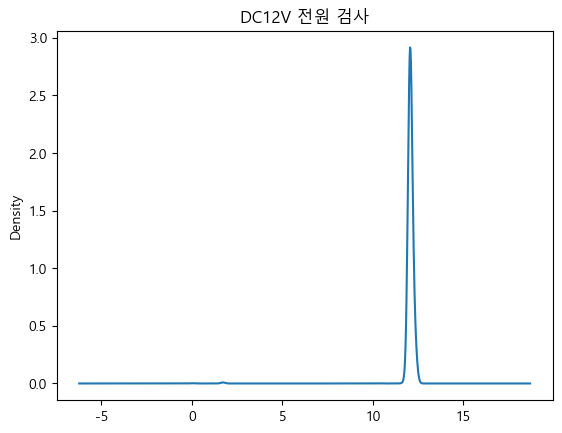

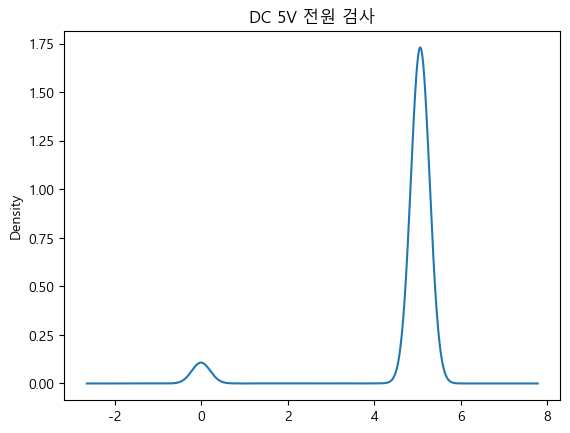

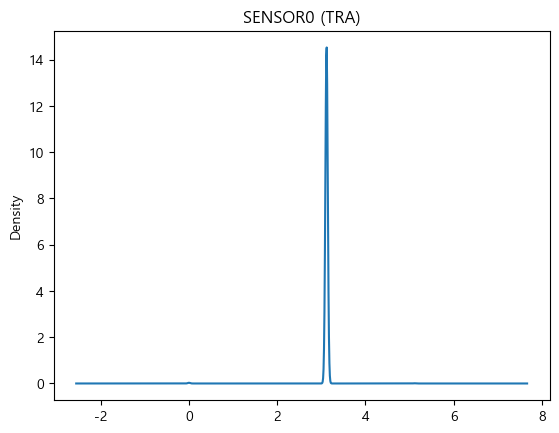

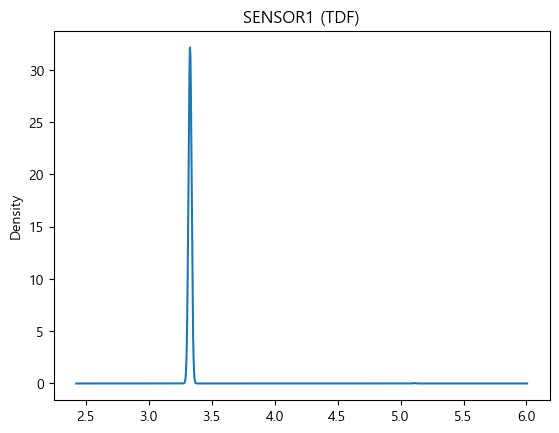

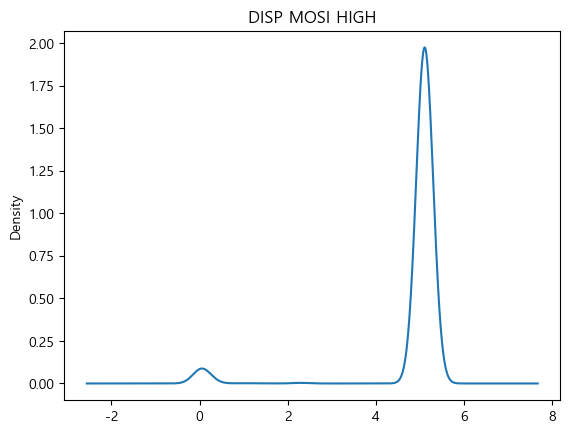

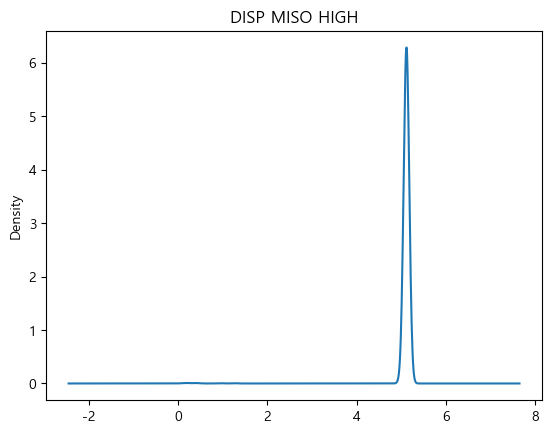

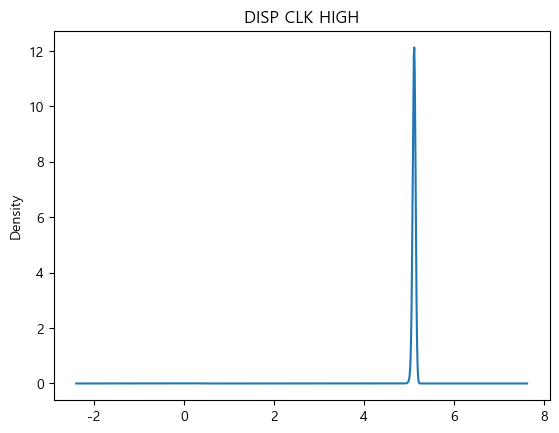

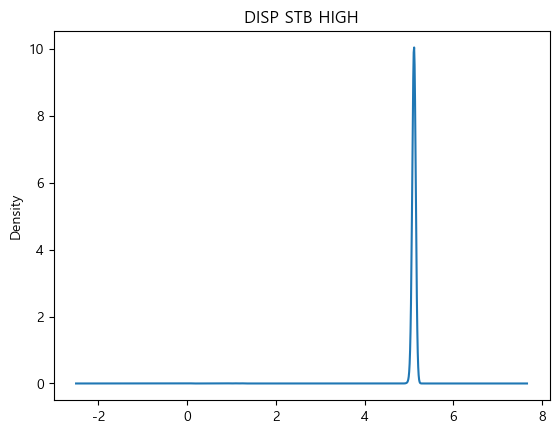

In [82]:
for k, v in df_list.items():
    plt.figure()
    v[k].plot(kind='density')
    plt.title(k)
    plt.show()


In [94]:
from scipy.stats import kstest, normaltest, shapiro, anderson


def boxplot_whiskers(x):
    plt.figure()
    boxplot = plt.boxplot(x)
    boxplot_whiskers = [item.get_ydata() for item in boxplot['whiskers']]
    return(boxplot_whiskers)

def outlier_check(x):
    y = boxplot_whiskers(x)
    print(np.min(y), np.max(y))
    sigma_3_p = np.mean(x) + 3*np.std(x) 
    sigma_3_m = np.mean(x) - 3*np.std(x)
    print('3 sigma range :',sigma_3_m, sigma_3_p)
    out_idx = np.where(x>=sigma_3_p)[0]
    out_values = x[out_idx]
    plt.figure()
    boxplot = plt.boxplot(x[-out_idx])
    return(pd.DataFrame({'outlier_index': out_idx,'outliers': out_values}))


## 'DC12V 전원 검사'

In [127]:
dc_12 = df_list['DC12V 전원 검사']

na_v = dc_12[dc_12['Status']!='OK']['DC12V 전원 검사'].mean()
dc_12['DC12V 전원 검사'].fillna(na_v,inplace = True)


In [128]:

test_stat, p_val = shapiro(dc_12['DC12V 전원 검사'])
ks_stat, p_valks = kstest(dc_12['DC12V 전원 검사'], 'norm')
nm_stat, p_valnm = normaltest(dc_12['DC12V 전원 검사'])

print("SHAPIRO Result : test-statistics : {}, p-value : {}".format(test_stat, p_val))
print("KS Result : test-statistics : {}, p-value : {}".format(ks_stat, p_valks))
print("Normal Result : test-statistics : {}, p-value : {}".format(nm_stat, p_valnm))

test_res1 = anderson(dc_12['DC12V 전원 검사'], dist = 'norm')
print(test_res1)


SHAPIRO Result : test-statistics : 0.09887492656707764, p-value : 0.0
KS Result : test-statistics : 0.9968323104335776, p-value : 0.0
Normal Result : test-statistics : 10255.335529749633, p-value : 0.0
AndersonResult(statistic=1390.718400341374, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


통계검정 해석 :
P-value < 0.05 이므로 해당 data는 정규분포를 따른다는 귀무 가설을 기각할 수 있습니다.

11.91 12.23
3 sigma range : 10.219834494193814 13.886506361785477


Empty DataFrame
Columns: [outlier_index, outliers]
Index: []

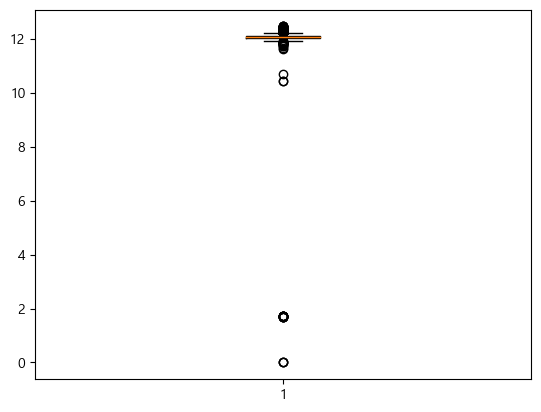

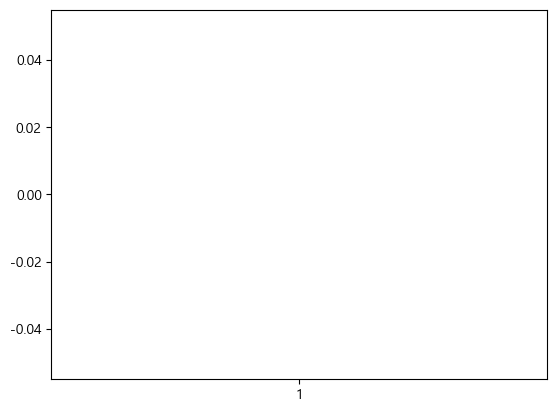

In [129]:

outlier_check(dc_12['DC12V 전원 검사'].values)

In [130]:
process = 'DC12V 전원 검사'

In [131]:
mean = dc_12[process].mean()
std = dc_12[process].std()

In [132]:
test_des = dc_12[(dc_12[process] < (mean+(3*std))) & (dc_12[process] > (mean-(3*std)))][process].describe()
display(test_des)
test_des['mean']

count    5035.000000
mean       12.087067
std         0.102531
min        10.420000
25%        12.030000
50%        12.060000
75%        12.110000
max        12.460000
Name: DC12V 전원 검사, dtype: float64

12.087067295288124

In [133]:
usl, lsl = test_des['mean'] + (2*test_des['std']), test_des['mean'] - (3*test_des['std'])
ucl, lcl = limt_ttl[process]['ucl'], limt_ttl[process]['lcl']
print(usl, lsl)
print(ucl, lcl)

12.29212871235993 11.779475169680417
12.36 11.64


In [134]:
test_df_c = dc_12.copy()


anomal_upper = test_df_c[test_df_c[process]>= usl].index
anomal_under = test_df_c[test_df_c[process]<= lsl].index
test_df_c['anomal_detection'] = 0
test_df_c.loc[anomal_upper, 'anomal_detection'] = 2
test_df_c.loc[anomal_under, 'anomal_detection'] =1
test_df_c.reset_index(drop=True, inplace=True)
display(test_df_c)

date     qty  DC12V 전원 검사 Status  anomal_detection
0     20230215   94008        12.03     OK                 0
1     20230215   94133        12.01     OK                 0
2     20230215   94206        12.03     OK                 0
3     20230215   94240        12.00     OK                 0
4     20230215   94332        12.02     OK                 0
...        ...     ...          ...    ...               ...
5046  20230215  113357        12.11     OK                 0
5047  20230215  113424        12.03     OK                 0
5048  20230215  113455        12.03     OK                 0
5049  20230215  113530        12.01     OK                 0
5050  20230215  114544        12.02     OK                 0

[5051 rows x 5 columns]

[0 0 0 ... 0 0 0]


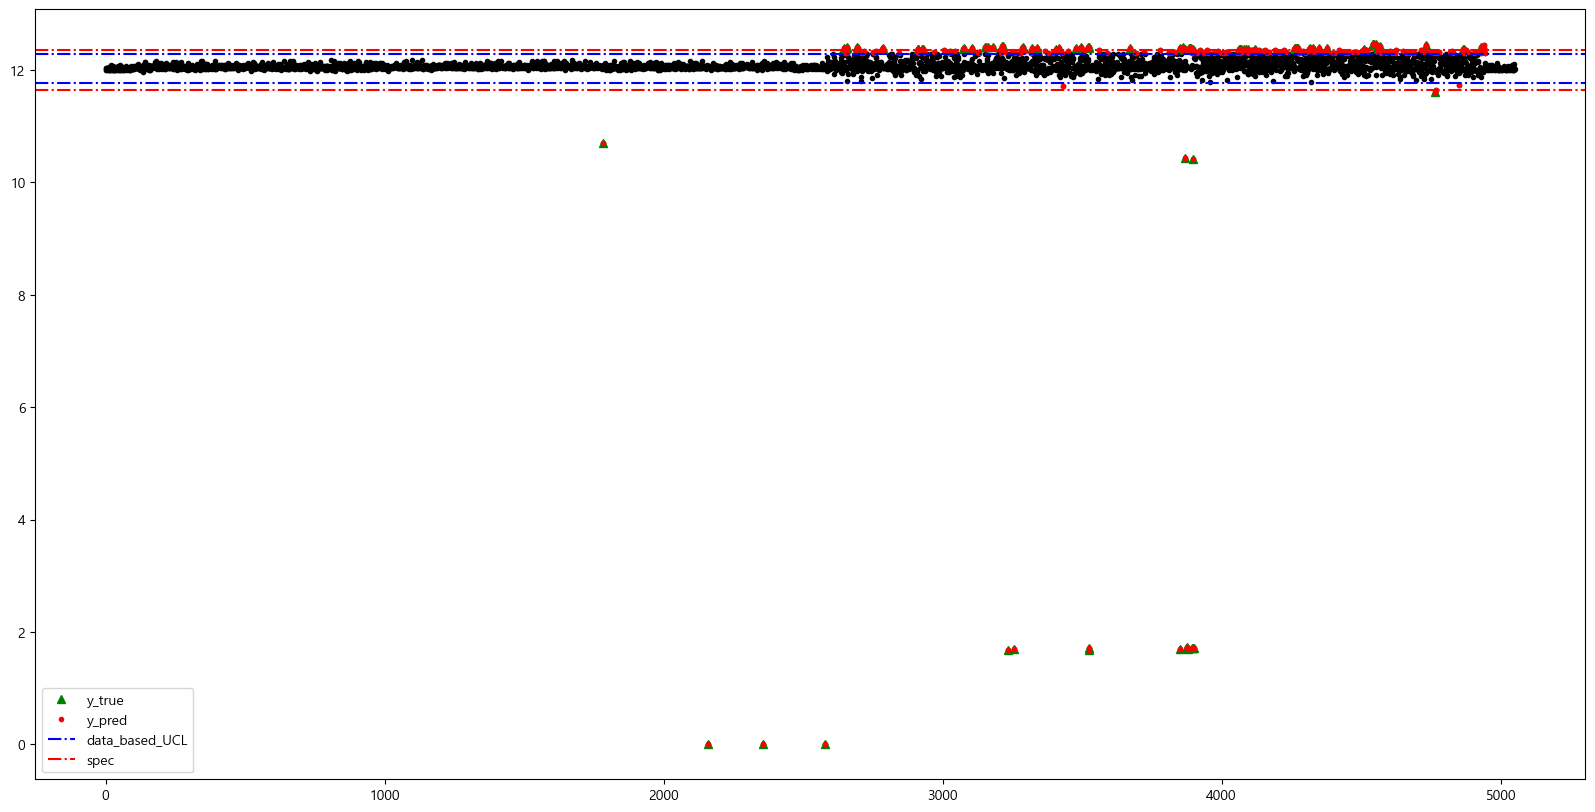

In [137]:
mask = test_df_c['anomal_detection'].values
print(mask)

anom_idx = test_df_c[(test_df_c['anomal_detection'] != 0)].index
y_idx = test_df_c[(test_df_c['Status'] != 'OK')].index
plt.figure(figsize=(20,10))
plt.plot(test_df_c.loc[:,process], '.k')

plt.plot(test_df_c.loc[y_idx,process], '^', color='g', label='y_true')

plt.plot(test_df_c.loc[anom_idx,process], '.r', label ='y_pred')
plt.axhline(y=usl, color='b', linestyle = '-.', label='data_based_UCL')
plt.axhline(y=lsl, color='b', linestyle = '-.')

plt.axhline(y=ucl, color='r', linestyle = '-.', label = 'spec')
plt.axhline(y=lcl, color='r', linestyle = '-.')
plt.legend()
# plt.ylim([106, 114])